In [1]:
#@Author Harrison Gietz
#July 2021

import pandas as pd
import matplotlib.pyplot as plt
import GS_functions as gs
import numpy as np

def add_command_lines(y_display):
    odd_or_even = 0
    for co, _ in enumerate(df.iterrows()):
        if (co == 0) or (df[last_successful_cmd_index][co] != (df[last_successful_cmd_index][co - 1])):
            try:
                make_a_line = (np.isnan(df[last_successful_cmd_index][co]) == False)
            except TypeError:
                make_a_line = True
            if make_a_line:
                if odd_or_even == 0:
                    plt.axvline(x = end_millis_x_axis[co], color='blue', linestyle='--', label = 'Last Cmd Sent')  
                else:
                    plt.axvline(x = end_millis_x_axis[co], color='blue', linestyle='--')
                if odd_or_even % 2 == 0:
                    plt.text(end_millis_x_axis[co] - 0.2, y_display, df[last_successful_cmd_index][co], rotation=90)                    
                else:
                    plt.text(end_millis_x_axis[co] - 0.2, y_display*6/5, df[last_successful_cmd_index][co], rotation=90)
                odd_or_even += 1
    return 0

In [2]:
#meaning of the different numbers in order:
#     1 start of telem
#     2 patload id (3)
#     3 length of data
#     4 indiciates the kind of data (ORI for orientation)
main_data_file_count_index = 5
data_file_line_count_index = 6
#     7 indicates the start of the main payload data 
main_start_millis_index = 8
main_end_millis_index = 9
temp3_index = 10
temp4_index = 11
temp5_index = 12
main_mag_x_index = 13
main_mag_negx_index = 14
main_mag_y_index = 15
main_mag_negy_index = 16
main_mag_z_index = 17
main_mag_negz_index = 18
main_accel_x_index = 19
main_accel_y_index = 20
main_accel_z_index = 21
latitude_index = 22
latitude_direction_index = 23
longitude_index = 24
longitude_direction_index = 25
altitude_index = 26
gps_timestamp_index = 27
fix_quality_index = 28
satellite_count_index = 29
number_cmd_rec_index = 30
number_cmd_success_index = 31
number_cmd_fail_index = 32
number_cmd_garble_index = 33
last_successful_cmd_index = 34
last_failed_cmd_index = 35
last_received_cmd_index = 36
time_last_cmd_received_index = 37
time_flight_started_index = 38
time_power_up_index = 39
image_count_index = 40
millis_before_image_index = 41
millis_after_image_index = 42

temp1_index = 49
temp2_index = 50
boom_mag_x_index = 51
boom_mag_negx_index = 52
boom_mag_y_index = 53
boom_mag_negy_index = 54
boom_mag_z_index = 55
boom_mag_negz_index = 56
boom_accel_x_index = 57
boom_accel_y_index = 58
boom_accel_z_index = 59
time_since_power_index = 60

In [3]:
#update data by running the cells, STARTING HERE

# df = pd.read_csv('HASP_downlink_07-28-21-13-47-48.csv', header = None, index_col = 0, skiprows = 1)
df = pd.read_csv('HASP_downlink_07-30-21-13-47-15.csv', header = None, index_col = 0, skiprows = 1)

df = df.dropna(thresh = 1)
df = df.reset_index(drop = True)
# for co, i in enumerate(df.loc[4]):
#     print(co + 1, ": ", i)

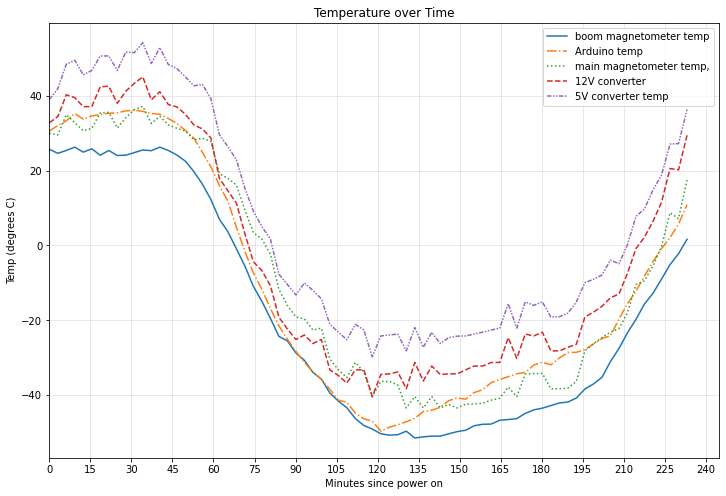

In [4]:
#save a seconds count list based on the file count
seconds = []
for co,_ in enumerate(df.iterrows()):
    seconds.append(co*180)
polling_cycle_count = df[main_data_file_count_index]

first_end_millis = df[main_end_millis_index][0]
end_millis_x_axis = (df[main_end_millis_index] - first_end_millis)/60000

# x_axis = polling_cycle_count
x_axis = end_millis_x_axis
#Plotting Temperatures
plt.figure(figsize = (12,8))
#first, plotting all 5 temperatures relative to time
plt.plot(x_axis, gs.temp_adc_to_deg(df[temp1_index]), label = 'boom magnetometer temp')
plt.plot(x_axis, gs.temp_adc_to_deg(df[temp2_index]), label = 'Arduino temp', linestyle = 'dashdot')
plt.plot(x_axis, gs.temp_adc_to_deg(df[temp3_index]), label = 'main magnetometer temp,', linestyle = 'dotted')
plt.plot(x_axis, gs.temp_adc_to_deg(df[temp4_index]), label = '12V converter', linestyle = 'dashed')
plt.plot(x_axis, gs.temp_adc_to_deg(df[temp5_index]), label = '5V converter temp', linestyle = (0,(3,1,1,1,1,1)))
plt.title('Temperature over Time')
add_command_lines(60)
#dictating the number of ticks shown on the x axis (prevent overflow)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
#Label axes
ax.set_xlabel('Minutes since power on')
ax.set_ylabel('Temp (degrees C)')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.xlim(0)
plt.legend(); plt.show()

In [5]:
# d = {i: indi for indi, i in enumerate(set(df[last_successful_cmd_index]))}
# plt.scatter(x_axis, [d[i] for i in df[last_successful_cmd_index]], 5)
# inv_d = {v: k for k, v in d.items()}
# plt.yticks(range(9), [inv_d[i] for i in range(9)])
# ax = plt.gca()
# ax.set_ylabel('Last Cmd'); ax.set_xlabel('Minutes since power on')
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add_command_lines(5)
# plt.legend()
# plt.title('Last Cmd Sent Over Time')
# plt.xlim(0)
# plt.show()

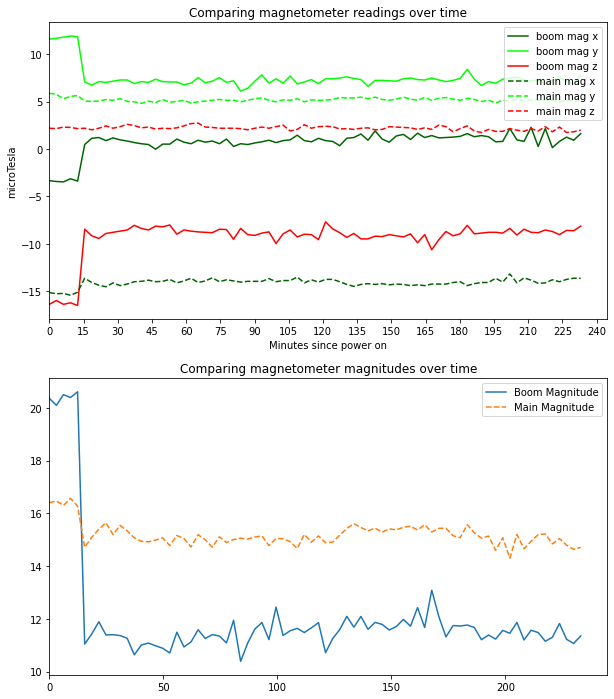

In [6]:
#graphing magnetometer data over time, from boom and regular payload
#save the magnetometer values for future use:
main_mag_x = gs.main_mag_x_adc_to_uT(df[main_mag_x_index], df[main_mag_negx_index])
main_mag_y = gs.main_mag_y_adc_to_uT(df[main_mag_y_index], df[main_mag_negy_index])
main_mag_z = gs.main_mag_z_adc_to_uT(df[main_mag_z_index], df[main_mag_negz_index])
boom_mag_x = gs.boom_mag_x_adc_to_uT(df[boom_mag_x_index], df[boom_mag_negx_index])
boom_mag_y = gs.boom_mag_y_adc_to_uT(df[boom_mag_y_index], df[boom_mag_negy_index])
boom_mag_z = gs.boom_mag_z_adc_to_uT(df[boom_mag_z_index], df[boom_mag_negz_index])
plt.figure(figsize = (10,12))
plt.subplot(211)
add_command_lines(-15)
plt.title('Comparing magnetometer readings over time')
plt.plot(x_axis, boom_mag_x,
         label = 'boom mag x', color = 'darkgreen')
plt.plot(x_axis, boom_mag_y,
         label = 'boom mag y', color = 'lime')
plt.plot(x_axis, boom_mag_z,
         label = 'boom mag z', color = 'red')
plt.plot(x_axis, main_mag_x,
         label = 'main mag x', linestyle = 'dashed', color = 'darkgreen')
plt.plot(x_axis, main_mag_y,
         label = 'main mag y', linestyle = 'dashed', color = 'lime')
plt.plot(x_axis, main_mag_z,
         label = 'main mag z', linestyle = 'dashed', color = 'red')
ax = plt.gca()
ax.set_ylabel('microTesla'); ax.set_xlabel('Minutes since power on')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xlim(0)
plt.legend()

plt.subplot(212)
add_command_lines(40)
plt.title('Comparing magnetometer magnitudes over time')
#ax = plt.gca()
ax.set_ylabel('microTesla'); ax.set_xlabel('Minutes since power on')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(x_axis, np.sqrt(boom_mag_x**2 + boom_mag_y**2 + boom_mag_z**2),
         label = 'Boom Magnitude')
plt.plot(x_axis, np.sqrt(main_mag_x**2 + main_mag_y**2 + main_mag_z**2),
         label = 'Main Magnitude', linestyle = 'dashed')
plt.xlim(0)
plt.legend()
plt.show()

In [7]:
#finding the approximate locations where the magnetometer x values spike (+/- 1 or 2 polling files)

previous_i = 0
weird_mag_numbers = []
weird_mag_minute_values = []
for co, i in enumerate(main_mag_x):
    if (co != 0) & (i - previous_i > 5):
#         print(co + 26)
        weird_mag_numbers.append(co + 26)
        weird_mag_minute_values.append(end_millis_x_axis[co])
    previous_i = i
print(weird_mag_numbers)
print(weird_mag_minute_values)

[]
[]


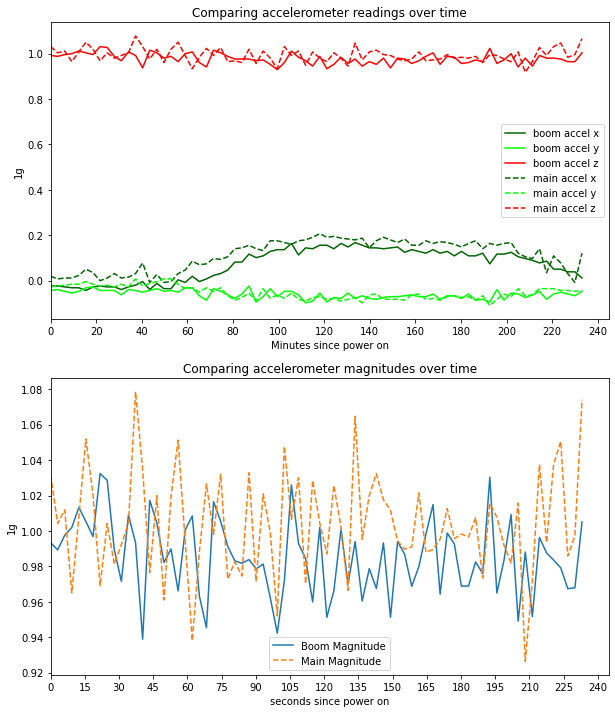

In [8]:
main_accel_x = df[main_accel_x_index]/1024
main_accel_y = df[main_accel_y_index]/1024
main_accel_z = df[main_accel_z_index]/1024
boom_accel_x = np.float32(df[boom_accel_x_index])/1024
boom_accel_y = np.float32(df[boom_accel_y_index])/1024
boom_accel_z = np.float32(df[boom_accel_z_index])/1024


plt.figure(figsize = (10,12))
plt.subplot(211)
plt.title('Comparing accelerometer readings over time')
plt.plot(x_axis, boom_accel_x, label = 'boom accel x', color = 'darkgreen')
plt.plot(x_axis, boom_accel_y, label = 'boom accel y', color = 'lime')
plt.plot(x_axis, boom_accel_z, label = 'boom accel z', color = 'red')
plt.plot(x_axis, main_accel_x, label = 'main accel x', 
         linestyle = 'dashed', color = 'darkgreen')
plt.plot(x_axis, main_accel_y, label = 'main accel y', 
         linestyle = 'dashed', color = 'lime')
plt.plot(x_axis, main_accel_z, label = 'main accel z', 
         linestyle = 'dashed', color = 'red')
ax = plt.gca()
ax.set_ylabel('1g'); ax.set_xlabel('Minutes since power on')
ax.xaxis.set_major_locator(plt.MaxNLocator(16))
add_command_lines(0.65)
plt.xlim(0)
plt.legend()

plt.subplot(212)
plt.title('Comparing accelerometer magnitudes over time')
ax = plt.gca()
ax.set_ylabel('1g'); ax.set_xlabel('seconds since power on')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(x_axis, np.sqrt(boom_accel_x**2 + boom_accel_y**2 + boom_accel_z**2),
         label = 'Boom Magnitude')
plt.plot(x_axis, np.sqrt(main_accel_x**2 + main_accel_y**2 + main_accel_z**2),
         label = 'Main Magnitude', linestyle = 'dashed')
add_command_lines(0.65)
plt.xlim(0)
plt.legend()
plt.show()

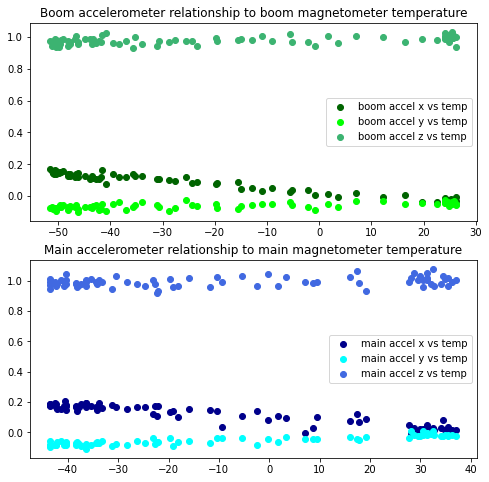

In [9]:
#plotting correlations of temperature and weird accelerometer values

plt.figure(figsize = (8,8))

plt.subplot(211)
plt.title('Boom accelerometer relationship to boom magnetometer temperature')
plt.scatter(gs.temp_adc_to_deg(df[temp1_index]), boom_accel_x, label = 'boom accel x vs temp', color = 'darkgreen')
plt.scatter(gs.temp_adc_to_deg(df[temp1_index]), boom_accel_y, label = 'boom accel y vs temp', color = 'lime')
plt.scatter(gs.temp_adc_to_deg(df[temp1_index]), boom_accel_z, label = 'boom accel z vs temp', color = 'mediumseagreen')
plt.legend()

plt.subplot(212)
plt.title('Main accelerometer relationship to main magnetometer temperature')
plt.scatter(gs.temp_adc_to_deg(df[temp3_index]), main_accel_x, label = 'main accel x vs temp', color = 'darkblue')
plt.scatter(gs.temp_adc_to_deg(df[temp3_index]), main_accel_y, label = 'main accel y vs temp', color = 'cyan')
plt.scatter(gs.temp_adc_to_deg(df[temp3_index]), main_accel_z, label = 'main accel z vs temp', color = 'royalblue')
plt.legend()
plt.show()

In [10]:
# method = 'kendall'
method = 'pearson'
# method = 'spearman'

print('correlation coeff of boom accel x to boom mag temp: ', 
      pd.Series(gs.temp_adc_to_deg(df[temp1_index])).corr(pd.Series(boom_accel_x), method = method))
print('correlation coeff of boom accel y to boom mag temp: ', 
      pd.Series(gs.temp_adc_to_deg(df[temp1_index])).corr(pd.Series(boom_accel_y), method = method))
print('correlation coeff of boom accel z to boom mag temp: ', 
      pd.Series(gs.temp_adc_to_deg(df[temp1_index])).corr(pd.Series(boom_accel_z), method = method))
print(' ')
print('correlation coeff of main accel x to main mag temp: ', 
      pd.Series(gs.temp_adc_to_deg(df[temp3_index])).corr(pd.Series(main_accel_x), method = method))
print('correlation coeff of main accel y to main mag temp: ', 
      pd.Series(gs.temp_adc_to_deg(df[temp3_index])).corr(pd.Series(main_accel_y), method = method))
print('correlation coeff of main accel z to main mag temp: ', 
      pd.Series(gs.temp_adc_to_deg(df[temp3_index])).corr(pd.Series(main_accel_z), method = method))

correlation coeff of boom accel x to boom mag temp:  -0.9787709315214866
correlation coeff of boom accel y to boom mag temp:  0.6335404603909404
correlation coeff of boom accel z to boom mag temp:  0.4641225488232073
 
correlation coeff of main accel x to main mag temp:  -0.9249921543581953
correlation coeff of main accel y to main mag temp:  0.8710430766551925
correlation coeff of main accel z to main mag temp:  0.31027006315698863
